# Importing Libraries

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/spacex_launch_data.csv")

In [ ]:
#handling missing values
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [ ]:
#handling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

In [ ]:
df.shape

(90, 17)

# Data Preprocessing

# Checking the missing values

In [ ]:
df.isnull().sum()/df.count()*100

FlightNumber       0.000
Date               0.000
BoosterVersion     0.000
PayloadMass        0.000
Orbit              0.000
LaunchSite         0.000
Outcome            0.000
Flights            0.000
GridFins           0.000
Reused             0.000
Legs               0.000
LandingPad        40.625
Block              0.000
ReusedCount        0.000
Serial             0.000
Longitude          0.000
Latitude           0.000
dtype: float64

# Removing columns

In [ ]:
df.drop(["LandingPad"],axis=1,inplace=True)

In [ ]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

In [ ]:
df["LaunchSite"].value_counts()

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [ ]:
df["Orbit"].value_counts()

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64

In [ ]:
df["Longitude"].value_counts()

Longitude
-80.577366     55
-80.603956     22
-120.610829    13
Name: count, dtype: int64

In [ ]:
df["Latitude"].value_counts()

Latitude
28.561857    55
28.608058    22
34.632093    13
Name: count, dtype: int64

In [ ]:
df["Block"].value_counts()

Block
5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: count, dtype: int64

In [ ]:
df["ReusedCount"].value_counts()

ReusedCount
0    30
1    24
3    12
5    11
2     9
4     4
Name: count, dtype: int64

In [ ]:
df["Flights"].value_counts()

Flights
1    53
2    19
3     8
4     6
5     2
6     2
Name: count, dtype: int64

# creating target column

In [ ]:
landing_outcomes=df["Outcome"].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [ ]:
for i,outcome in enumerate(landing_outcomes.keys()):
  print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [ ]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [ ]:
landing_class=[0 if i in set(bad_outcomes) else 1 for i in df["Outcome"]]

In [ ]:
df["class"]=landing_class
df[["class"]].head(8)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [ ]:
df["class"].mean()

0.6666666666666666

In [ ]:
df["class"].value_counts

<bound method IndexOpsMixin.value_counts of 0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: class, Length: 90, dtype: int64>

In [ ]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
df.tail()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,class
85,86,2020-09-03,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5.0,2,B1060,-80.577366,28.561857,1
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCAFS SLC 40,True ASDS,1,True,False,True,5.0,0,B1062,-80.577366,28.561857,1


In [ ]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


In [ ]:
df.tail(50)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,class
40,41,2017-10-30,Falcon 9,3700.000000,GTO,KSC LC 39A,True ASDS,1,True,False,True,4.0,0,B1042,-80.603956,28.608058,1
41,42,2017-12-15,Falcon 9,2205.000000,ISS,CCAFS SLC 40,True RTLS,2,True,True,True,3.0,1,B1035,-80.577366,28.561857,1
42,43,2017-12-23,Falcon 9,9600.000000,PO,VAFB SLC 4E,True Ocean,2,True,True,False,3.0,1,B1036,-120.610829,34.632093,1
43,44,2018-01-08,Falcon 9,6104.959412,LEO,CCAFS SLC 40,True RTLS,1,True,False,True,4.0,1,B1043,-80.577366,28.561857,1
44,45,2018-01-31,Falcon 9,4230.000000,GTO,CCAFS SLC 40,True Ocean,2,True,True,True,3.0,1,B1032,-80.577366,28.561857,1
45,46,2018-03-06,Falcon 9,6092.000000,GTO,CCAFS SLC 40,None None,1,True,False,True,4.0,0,B1044,-80.577366,28.561857,0
46,47,2018-03-30,Falcon 9,9600.000000,PO,VAFB SLC 4E,None None,2,True,True,True,4.0,1,B1041,-120.610829,34.632093,0
47,48,2018-04-02,Falcon 9,2760.000000,ISS,CCAFS SLC 40,None None,2,True,True,True,4.0,1,B1039,-80.577366,28.561857,0
48,49,2018-04-18,Falcon 9,350.000000,HEO,CCAFS SLC 40,True ASDS,1,True,False,True,4.0,1,B1045,-80.577366,28.561857,1
49,50,2018-05-11,Falcon 9,3750.000000,GTO,KSC LC 39A,True ASDS,1,True,False,True,5.0,3,B1046,-80.603956,28.608058,1


# Visual Analysis

# Univariate Analysis

<Axes: xlabel='LaunchSite', ylabel='count'>

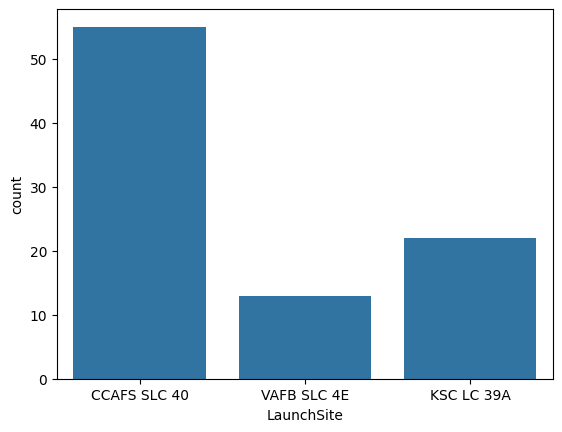

In [ ]:
sns.countplot(x="LaunchSite",data=df)

# Bivariate Analysis

In [ ]:
year=[]
def Extract_year(date):
  for i in df["Date"]:
    year.append(i.split("-")[0])
  return year

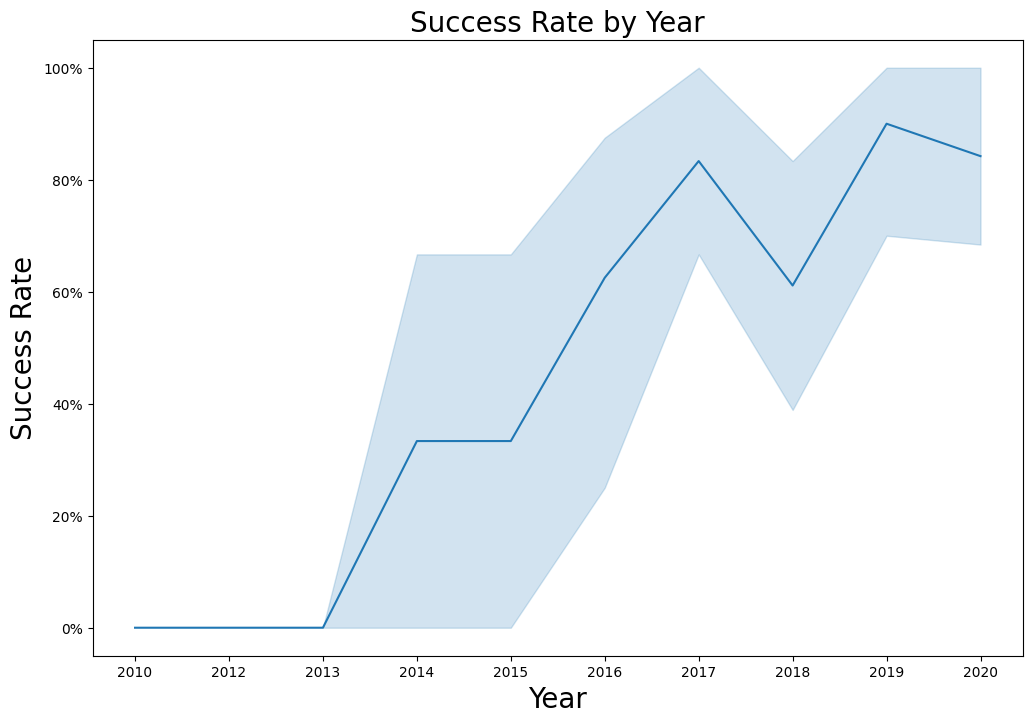

In [ ]:
df["year"]=Extract_year(df["Date"])
fig, ax=plt.subplots()
fig.set_size_inches(12,8)
sns.lineplot(x="year",y="class",data=df)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: "{:.0f}%".format(x*100)))
plt.title("Success Rate by Year",fontsize=20)
plt.show()

# multivariate

<Axes: >

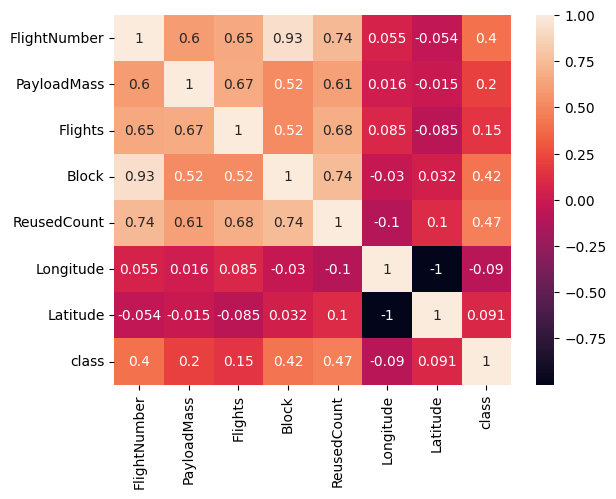

In [ ]:
# Step 1: Select only numerical columns
df1 = df.select_dtypes(include=[int, float])
sns.heatmap(df1.corr(),annot=True)

In [ ]:
df.drop(columns = ['BoosterVersion','Outcome','Serial','FlightNumber',"Reused","Date","year"], inplace=True)

# Label encoding categorical features

In [ ]:
orbit_le=LabelEncoder().fit(df['Orbit'])
df['Orbit']=orbit_le.transform(df['Orbit'])
launchsite_le=LabelEncoder().fit(df['LaunchSite'])
df['LaunchSite']=launchsite_le.transform(df['LaunchSite'])
longitude_le=LabelEncoder().fit(df['Longitude'])
df["Longitude"]=longitude_le.transform(df["Longitude"])
latitude_le=LabelEncoder().fit(df['Latitude'])
df["Latitude"]=latitude_le.transform(df["Latitude"])
gridfins_le=LabelEncoder().fit(df['GridFins'])
df["GridFins"]=gridfins_le.transform(df["GridFins"])
legs_le=LabelEncoder().fit(df['Legs'])
df['Legs']=legs_le.transform(df['Legs'])

In [ ]:
a=longitude_le.classes_

In [ ]:
type(a[0])

numpy.float64

In [ ]:
print(a)

[-120.610829   -80.6039558  -80.577366 ]


In [ ]:
b=latitude_le.classes_
type(b[0])
print(b)

[28.5618571 28.6080585 34.632093 ]


In [ ]:
g=gridfins_le.classes_
type(g[0])
print(g)

[False  True]


#Separating Features and target

In [ ]:
x=df[["PayloadMass","Orbit","LaunchSite","Longitude","Latitude","GridFins","Legs","Block","Flights","ReusedCount"]]
x.head()

,PayloadMass,Orbit,LaunchSite,Longitude,Latitude,GridFins,Legs,Block,Flights,ReusedCount
0,6104.959412,5,0,2,0,0,0,1.0,1,0
1,525.000000,5,0,2,0,0,0,1.0,1,0
2,677.000000,4,0,2,0,0,0,1.0,1,0
3,500.000000,7,2,0,2,0,0,1.0,1,0
4,3170.000000,2,0,2,0,0,0,1.0,1,0


In [ ]:

x.head()

,PayloadMass,Orbit,LaunchSite,Longitude,Latitude,GridFins,Legs,Block,Flights,ReusedCount
0,6104.959412,5,0,2,0,0,0,1.0,1,0
1,525.000000,5,0,2,0,0,0,1.0,1,0
2,677.000000,4,0,2,0,0,0,1.0,1,0
3,500.000000,7,2,0,2,0,0,1.0,1,0
4,3170.000000,2,0,2,0,0,0,1.0,1,0


In [ ]:
x.astype("float64")

,PayloadMass,Orbit,LaunchSite,Longitude,Latitude,GridFins,Legs,Block,Flights,ReusedCount
0,6104.959412,5.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
1,525.000000,5.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
2,677.000000,4.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
3,500.000000,7.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0
4,3170.000000,2.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,10.0,1.0,1.0,1.0,1.0,1.0,5.0,2.0,2.0
86,15400.000000,10.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,2.0
87,15400.000000,10.0,1.0,1.0,1.0,1.0,1.0,5.0,6.0,5.0
88,15400.000000,10.0,0.0,2.0,0.0,1.0,1.0,5.0,3.0,2.0


In [ ]:
y=df["class"]
y

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: class, Length: 90, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Scaling all features

In [ ]:
Scaler=preprocessing.StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.transform(x_test)

# Training The Model In Multiple Algorithms

# Logistic Regression Model

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

In [ ]:
lr_accuracy=accuracy_score(y_test,lr_pred)
lr_precision=precision_score(y_test,lr_pred)
lr_recall=recall_score(y_test,lr_pred)
lr_f1_score=f1_score(y_test,lr_pred)
lr_auc_score=roc_auc_score(y_test,lr.predict_proba(x_test)[:,1])

In [ ]:
lr_accuracy

0.9444444444444444

In [ ]:
cm = confusion_matrix(y_test, lr_pred)
cm

array([[ 3,  1],
       [ 0, 14]])

In [ ]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.93      1.00      0.97        14

    accuracy                           0.94        18
   macro avg       0.97      0.88      0.91        18
weighted avg       0.95      0.94      0.94        18



In [ ]:
d=[[3170.000000,2,0,2,0,0,0,1.0,1,0]]
input_data_scaled=Scaler.transform(d)
y_pred=lr.predict(input_data_scaled)
print(y_pred)

[0]


# Decision Tree Classifier model

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

In [ ]:
dt_accuracy = accuracy_score (y_test, dt_pred)
dt_precision=precision_score (y_test, dt_pred)
dt_recall=recall_score(y_test, dt_pred)
dt_f1_score=f1_score(y_test, dt_pred)
dt_auc_score=roc_auc_score (y_test, dt.predict_proba (x_test) [:, 1])

In [ ]:
dt_accuracy

0.9444444444444444

In [ ]:
cm = confusion_matrix(y_test, dt_pred)
cm

array([[ 4,  0],
       [ 1, 13]])

In [ ]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.93      0.96        14

    accuracy                           0.94        18
   macro avg       0.90      0.96      0.93        18
weighted avg       0.96      0.94      0.95        18



In [ ]:
d=[[3170.000000,2,0,2,0,0,0,1.0,1,0]]
input_data_scaled=Scaler.transform(d)
y_pred=dt.predict(input_data_scaled)
print(y_pred)

[0]


# KNN Classifier model

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred= knn.predict(x_test)
knn_accuracy = accuracy_score (y_test, knn_pred)
knn_precision= precision_score (y_test, knn_pred)
knn_recall = recall_score (y_test, knn_pred)
knn_f1_score=f1_score(y_test,knn_pred)
knn_auc_score = roc_auc_score (y_test, knn.predict_proba (x_test) [:, 1])

In [ ]:
dt_accuracy

0.9444444444444444

In [ ]:
cm = confusion_matrix(y_test, knn_pred)
cm

array([[ 4,  0],
       [ 1, 13]])

In [ ]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.93      0.96        14

    accuracy                           0.94        18
   macro avg       0.90      0.96      0.93        18
weighted avg       0.96      0.94      0.95        18



In [ ]:
d=[[3170.000000,2,0,2,0,0,0,1.0,1,0]]
input_data_scaled=Scaler.transform(d)
y_pred=knn.predict(input_data_scaled)
print(y_pred)

[0]


# Random Forest Model

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred= rf.predict(x_test)


In [ ]:
rf_accuracy = accuracy_score (y_test, rf_pred)
rf_precision = precision_score (y_test, rf_pred)
rf_recall = recall_score (y_test, rf_pred)
rf_f1_score = f1_score (y_test, rf_pred)
rf_auc_score =roc_auc_score (y_test, rf.predict_proba (x_test) [:, 1])

In [ ]:
rf_accuracy

0.9444444444444444

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
cm

array([[ 4,  0],
       [ 1, 13]])

In [ ]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.93      0.96        14

    accuracy                           0.94        18
   macro avg       0.90      0.96      0.93        18
weighted avg       0.96      0.94      0.95        18



In [ ]:
d=[[3170.000000,2,0,2,0,0,0,1.0,1,0]]
input_data_scaled=Scaler.transform(d)
y_pred=rf.predict(input_data_scaled)
print(y_pred)

[0]


# Testing The Model

In [ ]:
x.head()

,PayloadMass,Orbit,LaunchSite,Longitude,Latitude,GridFins,Legs,Block,Flights,ReusedCount
0,6104.959412,5,0,2,0,0,0,1.0,1,0
1,525.000000,5,0,2,0,0,0,1.0,1,0
2,677.000000,4,0,2,0,0,0,1.0,1,0
3,500.000000,7,2,0,2,0,0,1.0,1,0
4,3170.000000,2,0,2,0,0,0,1.0,1,0


In [ ]:
d=[[3170.000000,2,0,2,0,0,0,1.0,1,0]]
input_data_scaled=Scaler.transform(d)
y_pred=lr.predict(input_data_scaled)
print(y_pred)

[0]


In [ ]:
d=[[525.000000,5,0,2,0,0,0,1.0,1,0]]
input_data_scaled=Scaler.transform(d)
y_pred=lr.predict(input_data_scaled)
print(y_pred)

[0]


In [ ]:
d=[[500.000000,7,2,0,2,0,0,1.0,1,0]]
input_data_scaled=Scaler.transform(d)
y_pred=lr.predict(input_data_scaled)
print(y_pred)

[0]


In [ ]:
d=[[6104.959412,5,0,2,0,0,0,1.0,1,0]]
input_data_scaled=Scaler.transform(d)
y_pred=lr.predict(input_data_scaled)
print(y_pred)

[0]


In [ ]:
x.tail()

,PayloadMass,Orbit,LaunchSite,Longitude,Latitude,GridFins,Legs,Block,Flights,ReusedCount
85,15400.0,10,1,1,1,1,1,5.0,2,2
86,15400.0,10,1,1,1,1,1,5.0,3,2
87,15400.0,10,1,1,1,1,1,5.0,6,5
88,15400.0,10,0,2,0,1,1,5.0,3,2
89,3681.0,6,0,2,0,1,1,5.0,1,0


In [ ]:
d=[[15400.0,10,1,1,1,1,1,5.0,2,2]]
input_data_scaled=Scaler.transform(d)
y_pred=lr.predict(input_data_scaled)
print(y_pred)

[1]


In [ ]:
d=[[15400.0,10,1,1,1,1,1,5.0,3,2]]
input_data_scaled=Scaler.transform(d)
y_pred=lr.predict(input_data_scaled)
print(y_pred)

[1]


In [ ]:
d=[[15400.0,10,1,1,1,1,1,5.0,6,5]]
input_data_scaled=Scaler.transform(d)
y_pred=lr.predict(input_data_scaled)
print(y_pred)

[1]


In [ ]:
d=[[1,10,1,1,1,1,1,1.0,6,5]]
input_data_scaled=Scaler.transform(d)
y_pred=lr.predict(input_data_scaled)
print(y_pred)

[1]


In [ ]:
d=[[1540,10,1,1,1,0,0,5.0,6,5]]
input_data_scaled=Scaler.transform(d)
y_pred=lr.predict(input_data_scaled)
print(y_pred)

[0]


In [ ]:
metrics=pd.DataFrame({ 'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest'],
'Accuracy': [lr_accuracy, dt_accuracy, knn_accuracy, rf_accuracy],
'AUC Score': [lr_auc_score, dt_auc_score, knn_auc_score, rf_auc_score],
'Precision': [lr_precision, dt_precision, knn_precision, rf_precision],
'Recall': [lr_recall, dt_recall, knn_recall, rf_recall],
'F1 Score' : [lr_f1_score, dt_f1_score, knn_f1_score, rf_f1_score]})

print (metrics)

                 Model  Accuracy  AUC Score  Precision    Recall  F1 Score
0  Logistic Regression  0.944444   1.000000   0.933333  1.000000  0.965517
1        Decision Tree  0.944444   0.964286   1.000000  0.928571  0.962963
2                  KNN  0.944444   0.991071   1.000000  0.928571  0.962963
3        Random Forest  0.944444   0.982143   1.000000  0.928571  0.962963


In [ ]:
import pickle

In [ ]:
filename="project.pkl"
pickle.dump(lr,open(filename,'wb'))

In [ ]:
pickle.dump(orbit_le, open('orbit_le.pkl', 'wb'))
pickle.dump(launchsite_le, open('launchsite_le.pkl', 'wb'))

In [ ]:
pickle.dump(Scaler, open('scaler.pkl', 'wb'))

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'